In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
df = pd.read_csv("D:\Winter_Fashion_Trends_Dataset.csv")

print("=" * 50)
print("A. Первичный обзор данных")
print("=" * 50)

A. Первичный обзор данных


In [3]:
# Первые строки
print("\n1. Первые 5 строк данных:")
print(df.head())


1. Первые 5 строк данных:
   ID       Brand Category  Color   Material       Style  Gender       Season  \
0   1      Adidas   Gloves  Brown  Polyester  Streetwear   Women  Winter 2025   
1   2       Gucci   Gloves    Red    Leather      Sporty     Men  Winter 2023   
2   3         H&M     Coat  Brown     Fleece  Streetwear  Unisex  Winter 2025   
3   4  North Face     Coat   Blue   Cashmere      Formal     Men  Winter 2024   
4   5       Mango  Thermal   Blue   Cashmere      Formal  Unisex  Winter 2025   

   Price(USD)  Popularity_Score  Customer_Rating Trend_Status  
0      244.06               6.0              4.9     Trending  
1      366.73               8.8              3.3     Trending  
2      741.55               4.8              3.5     Trending  
3      116.09               7.5              3.1     Outdated  
4      193.16               7.8              4.3     Outdated  


In [4]:
# Последние строки
print("\n2. Последние 5 строк данных:")
print(df.tail())


2. Последние 5 строк данных:
      ID   Brand Category  Color   Material   Style  Gender       Season  \
145  146   Mango     Coat  Green       Down  Casual   Women  Winter 2024   
146  147     H&M   Jacket   Gray  Polyester  Formal  Unisex  Winter 2023   
147  148  Uniqlo   Jacket   Gray    Leather  Casual  Unisex  Winter 2024   
148  149   Prada   Beanie  Black       Wool  Formal  Unisex  Winter 2025   
149  150   Gucci   Gloves    Red       Down  Luxury     Men  Winter 2024   

     Price(USD)  Popularity_Score  Customer_Rating Trend_Status  
145      614.06               2.9              4.5     Emerging  
146      329.70               3.0              4.4     Outdated  
147      411.84               9.7              4.7     Outdated  
148      407.11               3.5              3.0      Classic  
149      256.39               7.3              3.6     Outdated  


In [5]:
# Структура данных
print("\n3. Размер датасета:")
print(f"Количество строк: {df.shape[0]}, Количество столбцов: {df.shape[1]}")

print("\n4. Информация о столбцах и типах данных:")
print(df.info())

print("\n5. Названия столбцов:")
print(df.columns.tolist())


3. Размер датасета:
Количество строк: 150, Количество столбцов: 12

4. Информация о столбцах и типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                150 non-null    int64  
 1   Brand             150 non-null    object 
 2   Category          150 non-null    object 
 3   Color             150 non-null    object 
 4   Material          150 non-null    object 
 5   Style             150 non-null    object 
 6   Gender            150 non-null    object 
 7   Season            150 non-null    object 
 8   Price(USD)        150 non-null    float64
 9   Popularity_Score  150 non-null    float64
 10  Customer_Rating   150 non-null    float64
 11  Trend_Status      150 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.2+ KB
None

5. Названия столбцов:
['ID', 'Brand', 'Category', 'Color',

In [6]:
# Проверка типов данных
print("\n6. Проверка типов данных:")
print(df.dtypes)



6. Проверка типов данных:
ID                    int64
Brand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Season               object
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object


In [7]:
# Проверяем, есть ли числовые столбцы с неправильным типом
# Price(USD) и Popularity_Score, Customer_Rating должны быть числовыми
for col in ['Price(USD)', 'Popularity_Score', 'Customer_Rating']:
    if df[col].dtype == 'object':
        print(f"Конвертируем {col} в числовой тип")
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n7. Типы данных после конвертации:")
print(df.dtypes)



7. Типы данных после конвертации:
ID                    int64
Brand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Season               object
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object


In [9]:
# B. Обработка данных
print("\n" + "=" * 50)
print("B. Обработка данных")
print("=" * 50)


B. Обработка данных


In [12]:
# 1. Пропущенные значения
print("\n1. Пропущенные значения:")


1. Пропущенные значения:


In [13]:
# Поиск пропусков
missing_values = df.isnull().sum()
print("Количество пропусков по столбцам:")
print(missing_values[missing_values > 0])

if missing_values.sum() > 0:
    print(f"\nОбщее количество пропусков: {missing_values.sum()}")
    
    # Процент пропусков
    missing_percent = (df.isnull().sum() / len(df)) * 100
    print("\nПроцент пропусков по столбцам:")
    print(missing_percent[missing_percent > 0])
    
    # Заполнение пропусков
    print("\nЗаполнение пропусков...")
    
    # Для числовых столбцов - медианой
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
            print(f"Заполнены пропуски в {col} медианой: {df[col].median():.2f}")
    
    # Для категориальных столбцов - модой
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"Заполнены пропуски в {col} модой: {mode_val}")
    
    print("\nПроверка после заполнения пропусков:")
    print(f"Осталось пропусков: {df.isnull().sum().sum()}")
else:
    print("Пропущенных значений не обнаружено.")

Количество пропусков по столбцам:
Series([], dtype: int64)
Пропущенных значений не обнаружено.


In [14]:
# 2. Дубликаты
print("\n2. Дубликаты:")



2. Дубликаты:


In [15]:
# Поиск дубликатов
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates}")

if duplicates > 0:
    print("Удаление дубликатов...")
    df = df.drop_duplicates()
    print(f"Осталось строк после удаления дубликатов: {len(df)}")
else:
    print("Полных дубликатов не обнаружено.")

Количество полных дубликатов: 0
Полных дубликатов не обнаружено.


In [16]:
# Проверка на частичные дубликаты (по ключевым полям)
key_columns = ['ID', 'Brand', 'Category', 'Season']
partial_duplicates = df.duplicated(subset=key_columns).sum()
print(f"Частичных дубликатов (по ключевым полям): {partial_duplicates}")

Частичных дубликатов (по ключевым полям): 0


In [ ]:
# 3. Выбросы
print("\n3. Выбросы:")

In [17]:
# Анализ выбросов для числовых столбцов
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Анализ выбросов для числовых столбцов:")

for col in numeric_columns:
    if col != 'ID':  # Пропускаем ID
        # Метод z-score
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers_z = np.sum(z_scores > 3)
        
        # Метод IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        print(f"{col}:")
        print(f"  Выбросы по z-score (>3 std): {outliers_z}")
        print(f"  Выбросы по IQR: {outliers_iqr}")
        print(f"  Мин: {df[col].min():.2f}, Макс: {df[col].max():.2f}, Медиана: {df[col].median():.2f}")

Анализ выбросов для числовых столбцов:
Price(USD):
  Выбросы по z-score (>3 std): 0
  Выбросы по IQR: 0
  Мин: 30.07, Макс: 788.03, Медиана: 445.82
Popularity_Score:
  Выбросы по z-score (>3 std): 0
  Выбросы по IQR: 0
  Мин: 1.10, Макс: 10.00, Медиана: 5.85
Customer_Rating:
  Выбросы по z-score (>3 std): 0
  Выбросы по IQR: 0
  Мин: 2.50, Макс: 5.00, Медиана: 3.80


In [18]:
# 4. Статистики данных
print("\n4. Статистический анализ:")


4. Статистический анализ:


In [19]:
# Описательная статистика
print("Описательная статистика для числовых столбцов:")
print(df[numeric_columns].describe())

Описательная статистика для числовых столбцов:
               ID  Price(USD)  Popularity_Score  Customer_Rating
count  150.000000  150.000000        150.000000       150.000000
mean    75.500000  443.105933          5.763333         3.802667
std     43.445368  211.630074          2.655763         0.719428
min      1.000000   30.070000          1.100000         2.500000
25%     38.250000  292.807500          3.400000         3.125000
50%     75.500000  445.820000          5.850000         3.800000
75%    112.750000  631.537500          8.225000         4.400000
max    150.000000  788.030000         10.000000         5.000000


In [20]:
# Для категориальных столбцов
print("\nАнализ категориальных столбцов:")
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    if col != 'ID':  # Пропускаем ID для анализа
        unique_count = df[col].nunique()
        print(f"\n{col}:")
        print(f"  Уникальных значений: {unique_count}")
        
        if unique_count <= 10:  # Выводим топ значений если их немного
            value_counts = df[col].value_counts()
            print("  Распределение:")
            for value, count in value_counts.items():
                print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")


Анализ категориальных столбцов:

Brand:
  Уникальных значений: 10
  Распределение:
    Mango: 25 (16.7%)
    North Face: 20 (13.3%)
    Uniqlo: 16 (10.7%)
    Prada: 16 (10.7%)
    H&M: 15 (10.0%)
    Gucci: 14 (9.3%)
    Nike: 13 (8.7%)
    Zara: 13 (8.7%)
    Adidas: 10 (6.7%)
    Levi's: 8 (5.3%)

Category:
  Уникальных значений: 10
  Распределение:
    Scarf: 23 (15.3%)
    Thermal: 19 (12.7%)
    Gloves: 18 (12.0%)
    Sweater: 17 (11.3%)
    Coat: 14 (9.3%)
    Jacket: 14 (9.3%)
    Beanie: 12 (8.0%)
    Cardigan: 11 (7.3%)
    Hoodie: 11 (7.3%)
    Boots: 11 (7.3%)

Color:
  Уникальных значений: 10
  Распределение:
    Beige: 24 (16.0%)
    Black: 21 (14.0%)
    Brown: 20 (13.3%)
    Gray: 15 (10.0%)
    Red: 14 (9.3%)
    White: 14 (9.3%)
    Cream: 12 (8.0%)
    Maroon: 11 (7.3%)
    Green: 10 (6.7%)
    Blue: 9 (6.0%)

Material:
  Уникальных значений: 7
  Распределение:
    Cotton: 29 (19.3%)
    Fleece: 27 (18.0%)
    Leather: 22 (14.7%)
    Cashmere: 21 (14.0%)
    Polyest

In [21]:
# Корреляционный анализ
print("\nКорреляционный анализ (матрица корреляций):")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)


Корреляционный анализ (матрица корреляций):
                        ID  Price(USD)  Popularity_Score  Customer_Rating
ID                1.000000   -0.011889          0.023857         0.105537
Price(USD)       -0.011889    1.000000         -0.039230         0.077361
Popularity_Score  0.023857   -0.039230          1.000000        -0.077262
Customer_Rating   0.105537    0.077361         -0.077262         1.000000


In [22]:
# C. Визуализация данных
print("\n" + "=" * 50)
print("C. Визуализация данных")
print("=" * 50)


C. Визуализация данных


In [23]:
# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(15, 12))


<Figure size 1500x1200 with 0 Axes>

1. Строим гистограмму распределения цен...


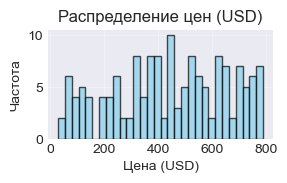

In [24]:
# 1. Гистограмма распределения цен
print("1. Строим гистограмму распределения цен...")
plt.subplot(3, 2, 1)
plt.hist(df['Price(USD)'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение цен (USD)')
plt.xlabel('Цена (USD)')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)


2. Строим boxplot цен по брендам...


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uniqlo'),
  Text(1, 0, "Levi's"),
  Text(2, 0, 'Adidas'),
  Text(3, 0, 'Mango'),
  Text(4, 0, 'Gucci'),
  Text(5, 0, 'Prada'),
  Text(6, 0, 'H&M'),
  Text(7, 0, 'Zara'),
  Text(8, 0, 'Nike'),
  Text(9, 0, 'North Face')])

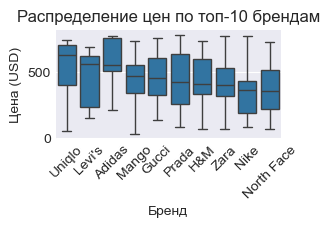

In [25]:
# 2. Boxplot для цен по брендам (топ 10 брендов)
print("2. Строим boxplot цен по брендам...")
plt.subplot(3, 2, 2)
top_brands = df['Brand'].value_counts().head(10).index.tolist()
df_top_brands = df[df['Brand'].isin(top_brands)]
brand_order = df_top_brands.groupby('Brand')['Price(USD)'].median().sort_values(ascending=False).index
sns.boxplot(data=df_top_brands, x='Brand', y='Price(USD)', order=brand_order)
plt.title('Распределение цен по топ-10 брендам')
plt.xlabel('Бренд')
plt.ylabel('Цена (USD)')
plt.xticks(rotation=45)

3. Строим столбчатую диаграмму по категориям...


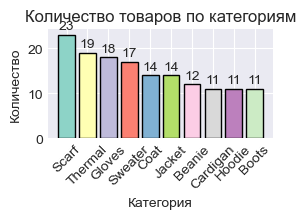

In [32]:
# 3. Столбчатая диаграмма: количество товаров по категориям
print("3. Строим столбчатую диаграмму по категориям...")
plt.subplot(3, 2, 3)
category_counts = df['Category'].value_counts()
colors = plt.cm.Set3(np.arange(len(category_counts)) / len(category_counts))
bars = plt.bar(category_counts.index, category_counts.values, color=colors, edgecolor='black')
plt.title('Количество товаров по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

4. Строим линейный график среднего рейтинга...


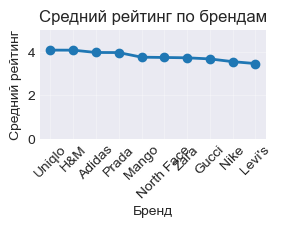

In [33]:
# 4. Линейный график: средний рейтинг по брендам
print("4. Строим линейный график среднего рейтинга...")
plt.subplot(3, 2, 4)
brand_rating = df.groupby('Brand')['Customer_Rating'].mean().sort_values(ascending=False)
plt.plot(brand_rating.index, brand_rating.values, marker='o', linewidth=2, markersize=6)
plt.title('Средний рейтинг по брендам')
plt.xlabel('Бренд')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.grid(True, alpha=0.3)

5. Строим heatmap корреляций...


Text(0.5, 1.0, 'Матрица корреляций')

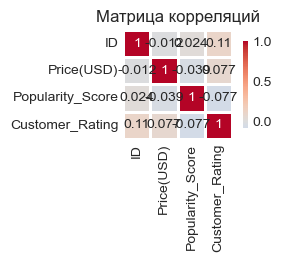

In [34]:
# 5. Heatmap корреляций
print("5. Строим heatmap корреляций...")
plt.subplot(3, 2, 5)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций')

6. Строим boxplot популярности по статусу тренда...


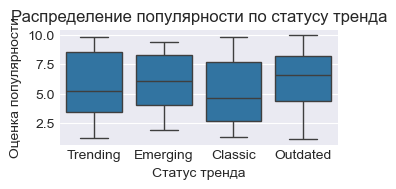

In [35]:
# 6. Boxplot для оценки популярности по статусу тренда
print("6. Строим boxplot популярности по статусу тренда...")
plt.subplot(3, 2, 6)
status_order = ['Trending', 'Emerging', 'Classic', 'Outdated']
sns.boxplot(data=df, x='Trend_Status', y='Popularity_Score', order=status_order)
plt.title('Распределение популярности по статусу тренда')
plt.xlabel('Статус тренда')
plt.ylabel('Оценка популярности')

plt.tight_layout()
plt.show()


In [36]:
# D. Группировки и агрегации
print("\n" + "=" * 50)
print("D. Группировки и агрегации")
print("=" * 50)


D. Группировки и агрегации


In [37]:
# 1. Группировка по брендам: средняя цена и рейтинг
print("1. Группировка по брендам:")
brand_stats = df.groupby('Brand').agg({
    'Price(USD)': ['mean', 'median', 'count'],
    'Customer_Rating': ['mean', 'median'],
    'Popularity_Score': ['mean', 'sum']
}).round(2)

# Переименовываем столбцы для удобства
brand_stats.columns = ['_'.join(col).strip() for col in brand_stats.columns.values]
print(brand_stats.sort_values('Price(USD)_mean', ascending=False).head(10))


1. Группировка по брендам:
            Price(USD)_mean  Price(USD)_median  Price(USD)_count  \
Brand                                                              
Adidas               565.40             555.62                10   
Uniqlo               536.19             630.86                16   
Levi's               459.95             564.06                 8   
Gucci                458.99             456.76                14   
H&M                  443.94             407.91                15   
Mango                440.22             468.58                25   
Prada                437.88             424.72                16   
Zara                 402.76             399.37                13   
Nike                 373.65             367.56                13   
North Face           368.17             358.65                20   

            Customer_Rating_mean  Customer_Rating_median  \
Brand                                                      
Adidas                      3.96    

In [38]:
# 2. Группировка по категориям
print("\n2. Группировка по категориям:")
category_stats = df.groupby('Category').agg({
    'Price(USD)': ['mean', 'min', 'max'],
    'Popularity_Score': 'mean',
    'Customer_Rating': 'mean',
    'ID': 'count'  # Количество товаров
}).round(2)

category_stats.columns = ['Avg_Price', 'Min_Price', 'Max_Price', 'Avg_Popularity', 'Avg_Rating', 'Count']
print(category_stats.sort_values('Avg_Price', ascending=False))


2. Группировка по категориям:
          Avg_Price  Min_Price  Max_Price  Avg_Popularity  Avg_Rating  Count
Category                                                                    
Hoodie       507.60     143.48     737.02            4.99        3.71     11
Coat         505.98     116.09     788.03            6.20        3.78     14
Cardigan     476.48      79.86     779.50            4.95        3.68     11
Jacket       456.07      63.68     779.42            5.34        4.19     14
Sweater      445.52      65.26     730.08            6.58        3.85     17
Beanie       438.44      72.01     716.93            5.97        3.83     12
Scarf        435.01      52.28     782.43            5.48        3.75     23
Boots        430.66      81.77     690.95            7.06        3.41     11
Thermal      406.98      69.14     742.55            5.16        3.85     19
Gloves       381.24      30.07     739.46            6.02        3.86     18


In [39]:
# 3. Группировка по статусу тренда
print("\n3. Группировка по статусу тренда:")
trend_stats = df.groupby('Trend_Status').agg({
    'Price(USD)': ['mean', 'median'],
    'Popularity_Score': ['mean', 'sum'],
    'Customer_Rating': 'mean',
    'ID': 'count'
}).round(2)

trend_stats.columns = ['Avg_Price', 'Median_Price', 'Avg_Popularity', 'Total_Popularity', 'Avg_Rating', 'Count']
print(trend_stats)


3. Группировка по статусу тренда:
              Avg_Price  Median_Price  Avg_Popularity  Total_Popularity  \
Trend_Status                                                              
Classic          383.27        383.46            5.04             141.2   
Emerging         449.76        485.92            5.91             177.3   
Outdated         442.02        442.66            6.16             308.2   
Trending         479.54        515.78            5.66             237.8   

              Avg_Rating  Count  
Trend_Status                     
Classic             3.69     28  
Emerging            3.68     30  
Outdated            3.84     50  
Trending            3.93     42  


In [40]:
# 4. Сводная таблица: средняя цена по брендам и категориям
print("\n4. Сводная таблица (pivot_table):")
pivot_table = pd.pivot_table(df, 
                             values='Price(USD)', 
                             index='Brand', 
                             columns='Category', 
                             aggfunc=['mean', 'count'],
                             fill_value=0)

print("Средняя цена по брендам и категориям:")
print(pivot_table['mean'].round(2))


4. Сводная таблица (pivot_table):
Средняя цена по брендам и категориям:
Category    Beanie   Boots  Cardigan    Coat  Gloves  Hoodie  Jacket   Scarf  \
Brand                                                                          
Adidas        0.00    0.00    775.42    0.00  393.32    0.00  771.22  430.58   
Gucci       548.71    0.00      0.00  134.66  313.03  513.28    0.00  586.29   
H&M         557.13    0.00      0.00  741.55  276.86  547.76  512.12  512.48   
Levi's        0.00  690.75    210.74  637.56    0.00  624.26    0.00  146.36   
Mango         0.00  489.11    597.69  573.52  259.04  481.15    0.00  419.65   
Nike        433.00  293.87    435.24    0.00   77.51  705.85    0.00  445.08   
North Face    0.00  433.16    426.39  356.24  281.50  349.96  511.82  380.94   
Prada       407.11  342.14     79.86  687.44  398.21    0.00  377.36  439.78   
Uniqlo      629.22    0.00      0.00  622.56  706.80  632.49  404.43  329.53   
Zara        196.70    0.00    458.24  377.90  5

In [41]:
# 5. Анализ по сезонам
print("\n5. Анализ по сезонам:")
season_stats = df.groupby('Season').agg({
    'Price(USD)': 'mean',
    'Popularity_Score': 'mean',
    'Customer_Rating': 'mean',
    'ID': 'count'
}).round(2).sort_values('Price(USD)', ascending=False)

season_stats.columns = ['Avg_Price', 'Avg_Popularity', 'Avg_Rating', 'Count']
print(season_stats)


5. Анализ по сезонам:
             Avg_Price  Avg_Popularity  Avg_Rating  Count
Season                                                   
Winter 2025     476.13            5.68        3.85     56
Winter 2023     428.96            5.84        3.79     42
Winter 2024     418.97            5.79        3.76     52


In [42]:
# 6. Анализ по материалам
print("\n6. Топ-10 материалов по средней цене:")
material_stats = df.groupby('Material').agg({
    'Price(USD)': 'mean',
    'Popularity_Score': 'mean',
    'ID': 'count'
}).round(2).sort_values('Price(USD)', ascending=False).head(10)

print(material_stats)


6. Топ-10 материалов по средней цене:
           Price(USD)  Popularity_Score  ID
Material                                   
Leather        536.48              5.95  22
Down           476.27              6.31  19
Fleece         452.31              5.91  27
Cotton         420.82              5.31  29
Wool           410.25              5.56  13
Cashmere       401.70              5.56  21
Polyester      391.00              5.85  19


In [43]:
# Итоговая информация
print("\n" + "=" * 50)
print("Итоговая информация")
print("=" * 50)
print(f"Общее количество записей: {len(df)}")
print(f"Количество брендов: {df['Brand'].nunique()}")
print(f"Количество категорий: {df['Category'].nunique()}")
print(f"Количество сезонов: {df['Season'].nunique()}")
print(f"Диапазон цен: ${df['Price(USD)'].min():.2f} - ${df['Price(USD)'].max():.2f}")
print(f"Средняя цена: ${df['Price(USD)'].mean():.2f}")
print(f"Средний рейтинг: {df['Customer_Rating'].mean():.2f}/5")
print(f"Средняя популярность: {df['Popularity_Score'].mean():.2f}/10")


Итоговая информация
Общее количество записей: 150
Количество брендов: 10
Количество категорий: 10
Количество сезонов: 3
Диапазон цен: $30.07 - $788.03
Средняя цена: $443.11
Средний рейтинг: 3.80/5
Средняя популярность: 5.76/10
